# 1. 기존 프로그램 방식
- 회귀분석

In [61]:
# 섭씨온도를 화씨온도로 출력
def c2f(c):
    return c * 1.8 + 32

# 2. 머신러닝 프로그램 방식

1. 데이터 확보 및 생성
2. 데이터 전처리 : 
    스케일 조정
    훈련데이터(학습데이터셋), 검증데이터셋, 시험데이터셋으로 분할
3. 모델구성
4. 모델 학습과정 설정
5. 모델 학습시키기
6. 모델 평가(시험데이터셋으로)
    <모델 저장>
7. 모델 저장 및 사용(입력값이 주어지면 예측값 받기)

## 2.1 노이즈가 없는 데이터로 실습

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### 1. 데이터 생성

In [63]:
data_C = np.arange(100) 
data_C # 독립변수(입력변수)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [64]:
data_F = c2f(data_C)
data_F # 종속변수(타겟변수, 출력변수)

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

### 2. 데이터 전처리 : 컴퓨터에게 학습시키기 위해 스케일 조정

In [65]:
scaled_data_C = data_C / 100.0
scaled_data_F = data_F / 100.0
print('학습시 독립변수 : ', scaled_data_C)
print('학습시 종속변수 : ', scaled_data_F)


학습시 독립변수 :  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
학습시 종속변수 :  [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688

### 3. 모델 구성

In [66]:
from tensorflow.keras.models import Sequential # 모델생성 함수
from tensorflow.keras.layers import Dense, Input # 입력값과 출력값으로 layer층 지정

model = Sequential()
# model.add(Input(shape=(1,)))
# model.add(Dense(1))
model.add(Dense(units=1,            #타겟(종속) 변수의 갯수  
                input_shape=(1,)))  # 입력(독립) 변수의 shape             

### 4. 모델 학습과정 설정
- loss : 손실함수 - 모델 학습 중 오차를 최소화하기 위해 사용
- optimizer : 옵티마이저
- metrics : 평가지표

- mse : 오차 제곱의 평균(이상치 영향 증가)
- mae : 오차 절대값의 평균(이상치 영향이 감소)

In [67]:
model.compile(loss='mse', optimizer='Adam', metrics=['mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### 5. 모델 학습시키기 - 1번만 실행

In [ ]:
hist = model.fit(scaled_data_C, # 독립변수 
                 scaled_data_F, # 종속변수
                 epochs = 3000, # 훈련횟수
                 verbose=2)     # 학습시 출력여부(0:출력X)

Epoch 1/10000
4/4 - 0s - loss: 3.9372 - mae: 1.7894 - 375ms/epoch - 94ms/step
Epoch 2/10000
4/4 - 0s - loss: 3.9144 - mae: 1.7835 - 7ms/epoch - 2ms/step
Epoch 3/10000
4/4 - 0s - loss: 3.8909 - mae: 1.7775 - 7ms/epoch - 2ms/step
Epoch 4/10000
4/4 - 0s - loss: 3.8675 - mae: 1.7716 - 6ms/epoch - 2ms/step
Epoch 5/10000
4/4 - 0s - loss: 3.8451 - mae: 1.7657 - 5ms/epoch - 1ms/step
Epoch 6/10000
4/4 - 0s - loss: 3.8214 - mae: 1.7597 - 6ms/epoch - 1ms/step
Epoch 7/10000
4/4 - 0s - loss: 3.7996 - mae: 1.7538 - 6ms/epoch - 1ms/step
Epoch 8/10000
4/4 - 0s - loss: 3.7772 - mae: 1.7480 - 5ms/epoch - 1ms/step
Epoch 9/10000
4/4 - 0s - loss: 3.7548 - mae: 1.7421 - 6ms/epoch - 1ms/step
Epoch 10/10000
4/4 - 0s - loss: 3.7324 - mae: 1.7362 - 6ms/epoch - 1ms/step
Epoch 11/10000
4/4 - 0s - loss: 3.7096 - mae: 1.7303 - 6ms/epoch - 1ms/step
Epoch 12/10000
4/4 - 0s - loss: 3.6880 - mae: 1.7245 - 5ms/epoch - 1ms/step
Epoch 13/10000
4/4 - 0s - loss: 3.6663 - mae: 1.7187 - 7ms/epoch - 2ms/step
Epoch 14/10000
4/4

### 6. 모델 평가(그래프를 통해 loss와 metrics값의 추이, 평가함수)

In [69]:
print(hist.history.keys())
print(hist.history['loss'][:5])
print(hist.history['mae'][:5])

dict_keys(['loss', 'mae'])
[3.937204360961914, 3.9144039154052734, 3.890862226486206, 3.8675496578216553, 3.845146417617798]
[1.789371371269226, 1.783461093902588, 1.7774887084960938, 1.7715518474578857, 1.7656562328338623]


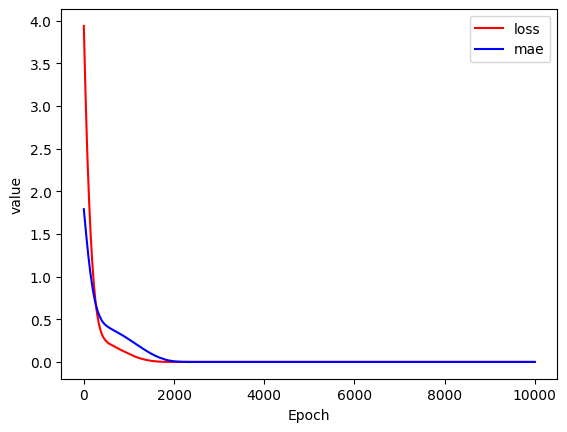

In [70]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('value')
plt.show()

### 7. 모델 저장 및 사용

In [71]:
model.predict(np.array([[0],[0.01]]))

1/1 [==============================] - 0s 66ms/step


array([[0.31999993],
       [0.33799994]], dtype=float32)

In [72]:
model.save('model/after_learning.h5')

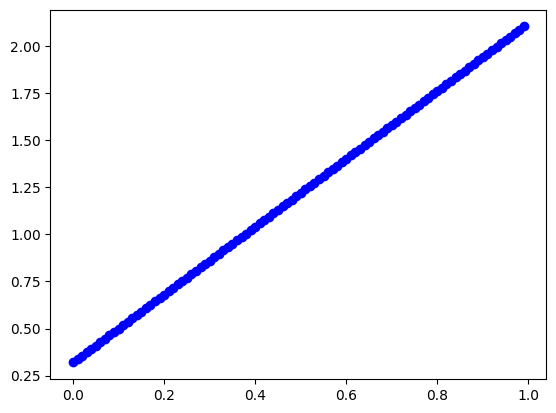

In [73]:
plt.scatter(x=scaled_data_C,
            y=scaled_data_F,
            c='b')
plt.show()

In [75]:
# 예측값
y_hat = model.predict([scaled_data_C])
for h, y in zip(y_hat, scaled_data_F):
    print('예측값:{}, 실제값:{}, 오차:{}'.format(h,
                                      y,
                                      h[0]-y))

4/4 [==============================] - 0s 2ms/step
예측값:[0.31999993], 실제값:0.32, 오차:-6.675720215509884e-08
예측값:[0.33799994], 실제값:0.33799999999999997, 오차:-6.008148190073115e-08
예측값:[0.35599992], 실제값:0.35600000000000004, 오차:-8.320808414508107e-08
예측값:[0.3739999], 실제값:0.374, 오차:-1.063346862784087e-07
예측값:[0.3919999], 실제값:0.392, 오차:-9.965896607955216e-08
예측값:[0.4099999], 실제값:0.41, 오차:-9.298324582518447e-08
예측값:[0.42799988], 실제값:0.428, 오차:-1.1610984801402324e-07
예측값:[0.44599986], 실제값:0.446, 오차:-1.3923645020286202e-07
예측값:[0.46399987], 실제값:0.46399999999999997, 오차:-1.3256072994849433e-07
예측값:[0.48199987], 실제값:0.48200000000000004, 오차:-1.2588500980514894e-07
예측값:[0.49999988], 실제값:0.5, 오차:-1.1920928955078125e-07
예측값:[0.5179998], 실제값:0.518, 오차:-1.7213821412731534e-07
예측값:[0.53599983], 실제값:0.536, 오차:-1.654624939284588e-07
예측값:[0.55399984], 실제값:0.554, 오차:-1.5878677372960226e-07
예측값:[0.5719998], 실제값:0.5720000000000001, 오차:-2.1171569830613635e-07
예측값:[0.5899998], 실제값:0.59, 오차:-2.050399779962575e-07
예측값

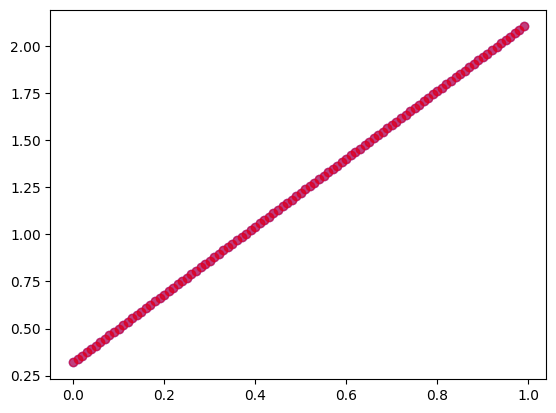

In [79]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b', alpha=0.5)
plt.scatter(x=scaled_data_C, y=y_hat, c='r', alpha=0.5)

## 2.2 노이즈가 있는 데이터로 실습

In [81]:
noise = np.random.normal(0,scale=0.1, size=100) # 평균 0, 표준편차 0.1개 100개 데이터
noised_scaled_data_F = scaled_data_F + noise

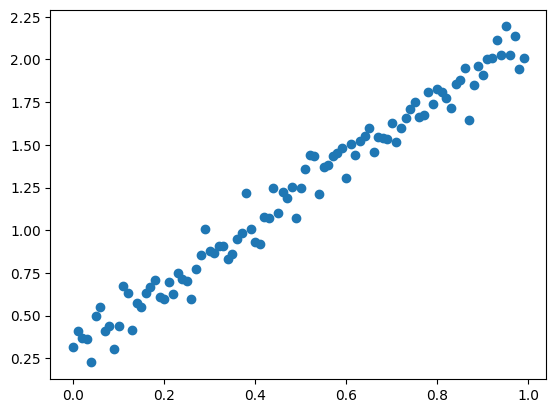

In [82]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F)
plt.show()

### 3. 모델 구성

In [83]:
model2 = Sequential()
model2.add(Dense(1,input_shape=(1,)))

### 4. 학습과정 설정

In [84]:
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### 5. 모델 학습

In [85]:
hist2 = model2.fit(scaled_data_C, noised_scaled_data_F, epochs=1000, verbose=1)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4665 - mae: 0.6486
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4517 - mae: 0.6376
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4406 - mae: 0.6294
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4309 - mae: 0.6220
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4230 - mae: 0.6161
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4145 - mae: 0.6094
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4070 - mae: 0.6037
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3993 - mae: 0.5976
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3916 - mae: 0.5915
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3837 - mae: 0.5853
Epoch 11/1000
4/4 [==============================] - 0s 3ms/step - lo

### 6. 학습된 모델 과정 보기

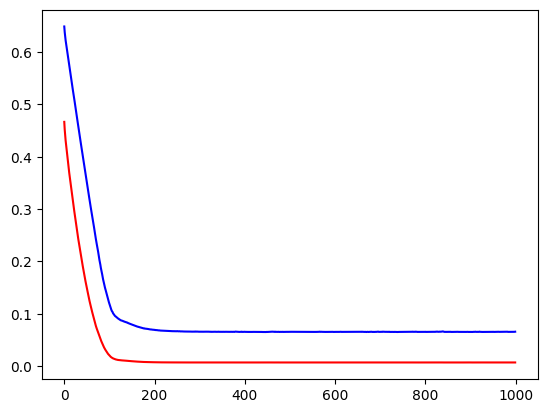

In [88]:
plt.plot(hist2.history['loss'] ,c='r')
plt.plot(hist2.history['mae'], c='b')

In [97]:
hist2.history['loss']

[0.46647167205810547,
 0.45165154337882996,
 0.44060492515563965,
 0.430894136428833,
 0.42299002408981323,
 0.4144677221775055,
 0.4069509506225586,
 0.3992677927017212,
 0.39155125617980957,
 0.3836805820465088,
 0.3759417235851288,
 0.36914077401161194,
 0.3624833822250366,
 0.3552696704864502,
 0.34871917963027954,
 0.34178513288497925,
 0.334881067276001,
 0.3284545838832855,
 0.32168248295783997,
 0.31560540199279785,
 0.30962544679641724,
 0.3033163547515869,
 0.297112375497818,
 0.29100146889686584,
 0.2844317555427551,
 0.27804166078567505,
 0.2721250653266907,
 0.26554185152053833,
 0.26021677255630493,
 0.25440308451652527,
 0.24856676161289215,
 0.24306100606918335,
 0.23774410784244537,
 0.2324906289577484,
 0.22676032781600952,
 0.2210884839296341,
 0.21593114733695984,
 0.21057741343975067,
 0.20563746988773346,
 0.2007455974817276,
 0.19629725813865662,
 0.19092553853988647,
 0.1860627979040146,
 0.1810988485813141,
 0.17587757110595703,
 0.1712852418422699,
 0.16675910

### 7. 모델 저장

In [98]:
model2.save('model/noise_after_learning.h5')

In [102]:
# 예측값
y_hat = model2.predict([scaled_data_C])

4/4 [==============================] - 0s 2ms/step


In [100]:
for h, y in zip(y_hat, noised_scaled_data_F):
    print('실제 값:{}, 예측값:{}, 오차:{}'.format(y,h,h[0]-y))

실제 값:0.31392719438241223, 예측값:[0.30994445], 오차:-0.0039827435271571066
실제 값:0.40922269291416535, 예측값:[0.32818475], 오차:-0.08103793925777802
실제 값:0.3701517261040308, 예측값:[0.3464251], 오차:-0.02372663984418888
실제 값:0.36522492995086586, 예측값:[0.3646654], 오차:-0.0005595408898917409
실제 값:0.22594966145650475, 예측값:[0.38290572], 오차:0.15695606020792396
실제 값:0.4974365599669493, 예측값:[0.40114605], 오차:-0.096290505699066
실제 값:0.5524666950257604, 예측값:[0.41938636], 오차:-0.1330803379567449
실제 값:0.4126523543289646, 예측값:[0.43762666], 오차:0.02497430554118313
실제 값:0.4390627798153848, 예측값:[0.455867], 오차:0.01680421265821752
실제 값:0.30546876796665295, 예측값:[0.47410733], 오차:0.16863855711040393
실제 값:0.43861386820063436, 예측값:[0.49234763], 오차:0.05373375967755473
실제 값:0.6713509191389604, 예측값:[0.51058793], 오차:-0.1607629884596391
실제 값:0.6309338454570379, 예측값:[0.52882826], 오차:-0.10210558217426202
실제 값:0.4149043945166758, 예측값:[0.5470686], 오차:0.13216420136955465
실제 값:0.5730293561133568, 예측값:[0.5653089], 오차:-0.007720427623671755


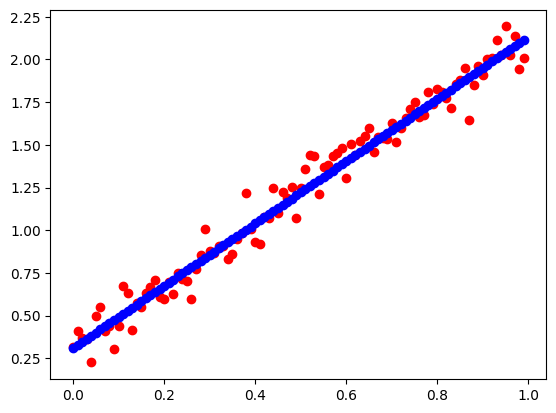

In [ ]:
plt.scatter(x= scaled_data_C, y=noised_scaled_data_F, c='r')
plt.scatter(x= scaled_data_C, y=y_hat, c='b')